In [1]:
import pandas as pd
import nltk

In [2]:
data = pd.read_csv('SuicideAndDepression_Detection_Data.csv')

In [3]:
data.head()

,text,class
0,Does life actually work for most / non-depress...,depression
1,I found my friend's bodyIt was almost nine yea...,depression
2,Ex Wife Threatening SuicideRecently I left my ...,SuicideWatch
3,Am I weird I don't get affected by compliments...,teenagers
4,Finally 2020 is almost over... So I can never ...,teenagers


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348124 entries, 0 to 348123
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    348123 non-null  object
 1   class   348110 non-null  object
dtypes: object(2)
memory usage: 5.3+ MB


In [5]:
data.describe()

,text,class
count,348123,348110
unique,348123,3
top,A girl called me smart I didn’t know how to re...,teenagers
freq,1,116037


In [6]:
data['class'].value_counts()

teenagers       116037
SuicideWatch    116037
depression      116036
Name: class, dtype: int64

In [7]:
data['length'] = data['text'].str.len()

In [8]:
# reduced dataset due to slow performance with over 300,000 records
data = data.head(1000)

In [9]:
data['class'].value_counts()
# data for three classes is still roughly equally distributed

teenagers       339
depression      332
SuicideWatch    329
Name: class, dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

array([[<AxesSubplot:title={'center':'SuicideWatch'}>,
        <AxesSubplot:title={'center':'depression'}>],
       [<AxesSubplot:title={'center':'teenagers'}>, <AxesSubplot:>]],
      dtype=object)

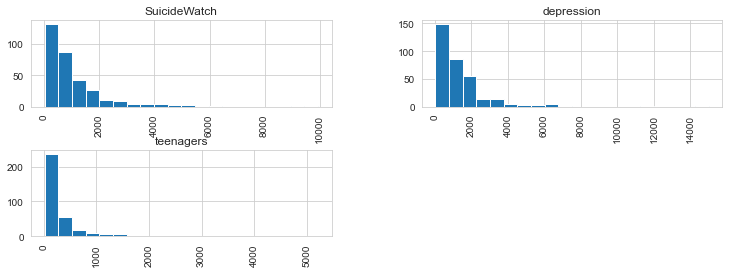

In [11]:
data.hist(column='length', by='class', bins=20, figsize=(12,4))

In [12]:
import string
from nltk.corpus import stopwords

In [13]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [15]:
data['text'].head().apply(text_process)

0    [life, actually, work, nondepressed, peopleIt,...
1    [found, friends, bodyIt, almost, nine, years, ...
2    [Ex, Wife, Threatening, SuicideRecently, left,...
3    [weird, dont, get, affected, compliments, comi...
4    [Finally, 2020, almost, never, hear, 2020, bad...
Name: text, dtype: object

In [16]:
data['text'].apply(text_process)

0      [life, actually, work, nondepressed, peopleIt,...
1      [found, friends, bodyIt, almost, nine, years, ...
2      [Ex, Wife, Threatening, SuicideRecently, left,...
3      [weird, dont, get, affected, compliments, comi...
4      [Finally, 2020, almost, never, hear, 2020, bad...
                             ...                        
995    [fucking, hard, walk, street, nobody, looking,...
996    [don’t, know, anymoreI’m, truly, lost, I’m, 27...
997    [Nothing, guaranteedYou, work, hard, also, nee...
998    [need, vent, xpost, rmentalhealthSorry, wall, ...
999    [Im, going, waitUntil, summer, Im, going, poss...
Name: text, Length: 1000, dtype: object

In [17]:
data.head()

,text,class,length
0,Does life actually work for most / non-depress...,depression,254.0
1,I found my friend's bodyIt was almost nine yea...,depression,3009.0
2,Ex Wife Threatening SuicideRecently I left my ...,SuicideWatch,715.0
3,Am I weird I don't get affected by compliments...,teenagers,138.0
4,Finally 2020 is almost over... So I can never ...,teenagers,129.0


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
bow_transformer = CountVectorizer(analyzer=text_process)

In [20]:
bow_transformer.fit(data['text'])

CountVectorizer(analyzer=<function text_process at 0x0000019607A54670>)

In [21]:
text_bow = bow_transformer.transform(data['text'])

In [22]:
print('Shape of Sparse Matrix:', text_bow.shape)

Shape of Sparse Matrix: (1000, 11600)


In [23]:
sparsity = (100.0 * text_bow.nnz / (text_bow.shape[0] * text_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.5505431034482758


In [24]:
from sklearn.feature_extraction.text import TfidfTransformer

In [25]:
tfidf = TfidfTransformer().fit(text_bow)

In [26]:
text_tfidf = tfidf.transform(text_bow)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
msg_train, msg_test, label_train, label_test = train_test_split(text_tfidf, data['class'], test_size=.2)

In [45]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300)

In [46]:
model.fit(msg_train, label_train)

RandomForestClassifier(n_estimators=300)

In [47]:
predictions = model.predict(msg_test)

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

SuicideWatch       0.74      0.56      0.64        62
  depression       0.77      0.72      0.74        64
   teenagers       0.74      0.93      0.83        74

    accuracy                           0.75       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.75      0.74       200

